# **Capstone Project: Music Recommendation System**
--------------
## **Context**
--------------

With the advent of technology, societies have become more efficient with their lives. At the same
time, however, individual human lives have also become more fast-paced and distracted, leaving
little time to explore artistic pursuits. Also, technology has made significant advancements in the
ability to coexist with art and general entertainment. It has in fact made it easier for humans with a
shortage of time to find and consume good content.
Almost every internet-based company's revenue relies on the time consumers spend on its platform.
These companies need to be able to figure out what kind of content is needed in order to increase
customer time spent and make their experience better. Therefore, one of the key challenges for
these companies is figuring out what kind of content their customers are most likely to consume.
Spotify is one such audio content provider with a huge market base across the world. With the
ever-increasing volume of songs becoming available on the Internet, searching for songs of interest
has become a tedious task in itself. However, Spotify has grown significantly in the market because
of its ability to recommend the ‘best’ next song to each and every customer based on a huge
preference database gathered over time - millions of customers and billions of songs. This is done
by using smart recommendation systems that can recommend songs based on users’ likes/dislikes.

----------------
## **Objective**
----------------

Build a recommendation system to propose the top 10 songs for a user based on the likelihood of
listening to those songs.

-----------------------------
## **Dataset** 
-----------------------------

The core dataset is the Taste Profile Subset released by The Echo Nest as part of the Million Song
Dataset. There are two files in this dataset. One contains the details about the song id, titles, release,
artist name, and the year of release. The second file contains the user id, song id, and the play count
of users.

**song_data**
- **song_id:** A unique id given to every song
- **title:** Title of the song
- **Release:** Name of the released album
- **Artist_name:** Name of the artist
- **year:** Year of release

**count_data**
- **user _id:** A unique id given to the user
- **song_id:** A unique id given to the song
- **play_count:** Number of times the song was played

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [3]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Great Learning/Capstone Project/Dataset/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Great Learning/Capstone Project/Dataset/song_data.csv')

### **Understanding the data by viewing a few observations**

In [4]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [6]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [8]:
# See the missing values of the count_df data
count_df.isnull().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [9]:
# See the missing values of the song_df data
song_df.isnull().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

#### **Observations and Insights:**

* There are **2,000,000 observations and 4 columns** in the count_df data.
* The 'user_id' and 'song_id' are of **object data type**. The 'play_count' column is of **numeric data type**. We also have a column named 'Unnamed' that we are dropping because it doesn't add value to our analysis.
* There are no **missing values** in the count_df data.
* There are **1,000,000 observations and 5 columns** in the song_df data.
* All the columns are of **object data type** except the **year column**. The year column is of **numeric data type**.
* In the song_df data we have **15 missing values** in the **title column** and **5 missing values** in the **release column**.

### **Merge the datasets and drop the 'Unnamed:0' column**

In [10]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on = 'song_id', how = 'left')

# Drop the column 'Unnamed: 0'
df = df.drop(['Unnamed: 0'], axis = 1)

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

### **Apply Label Encoding to the columns 'user_id' and 'song_id'**

In [11]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder    # To do label encoding

#Label Encoding
le = LabelEncoder()

#Fit transform the user_id column
df['user_id'] = le.fit_transform(df['user_id'])

#Fit transform the song_id column
df['song_id'] = le.fit_transform(df['song_id'])

In [12]:
#Checking the merge dataset
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [13]:
# Checking the info of the merge dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   song_id      int64 
 2   play_count   int64 
 3   title        object
 4   release      object
 5   artist_name  object
 6   year         int64 
dtypes: int64(4), object(3)
memory usage: 122.1+ MB


**Observations:**

* In the merge dataset, there are **2,000,000 observations and 7 columns**.
* The **title, release** and **artist_name** are of **object data type**. The rest are of **numeric data type**.

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

## **Data Preparation**

We will be taking users who have listen at least 90 songs, as we prefer to have some number of listeners of a song and the song which has at least 120 listeners.

In [14]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [15]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [16]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [17]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
  
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [18]:
# Drop records with play_count more than(>) 5
df_final = df_final[df_final['play_count'] <= 5]

In [19]:
# Check the shape of the data
df_final.shape

(117876, 7)

**Observations:**

* The **df_final** dataset has **117,876 observations and 7 columns** with the modifications made to it.

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

**Total number of unique user id**

In [20]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

**Total number of unique song id**

In [21]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

**Total number of unique artists**

In [22]:
# Display total number of unique artists
df['artist_name'].nunique()

3374

#### **Observations and Insights:**

* There are **3155 unique users** in the dataset.
* There are **563 unique songs** in the dataset.
* There are **3374 unique artists** in the dataset.
* As per the number of unique users and songs, there is a **possibility of 3155 * 563 = 1,776,265 interactions/listenings** in the dataset. But **we only have 117,876 interactions/listenings**, i.e., not every user has listened to every song in the dataset. So, we can build a recommendation system to recommend songs to users which they have not listened/interacted with.
* It seems a little bit ilogic that the dataset has more **unique artists** than **unique songs**. Maybe some names were written differently, but are the same artist. Also, there could be some different songs that have the same name.

### **Let's find out about the most interacted songs and interacted users**

**Most interacted songs**

In [23]:
df_final['song_id'].value_counts()

8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: song_id, Length: 563, dtype: int64

In [24]:
df_final[df_final['song_id'] == 8582].head(1)

,user_id,song_id,play_count,title,release,artist_name,year
1000,56576,8582,3,Use Somebody,Use Somebody,Kings Of Leon,2008


**Most interacted users**

In [25]:
df_final['user_id'].value_counts()

61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: user_id, Length: 3155, dtype: int64

#### **Observations and Insights:**

* The song with **song_id = 8582** has the highest interactions counts with **751**. This song_id belongs to the 'Use Somebody' song from Kings Of Leon.
* But still, there is a possibility of **3155-751 = 2404 more interactions** as we have **3155 unique users** in our datasets. For those 2404 remaining users, we can build a recommendation system to predict who is most likely to listen to this song.

* The user with **user_id = 61472** has interacted/listened to the most number of different **songs (243)**.
* But still, there is a possibility of **563-243 = 320** more interactions as we have **563 unique songs** in our datasets.

### **Checking if there is only one interaction between a song and a user**

In [26]:
df_final.groupby(['user_id', 'song_id']).count()

play_count  title  release  artist_name  year
user_id song_id                                               
11      5158              1      1        1            1     1
        8019              1      1        1            1     1
        8882              1      1        1            1     1
17      314               1      1        1            1     1
        703               1      1        1            1     1
...                     ...    ...      ...          ...   ...
76342   5375              1      1        1            1     1
        7889              1      1        1            1     1
        8494              1      1        1            1     1
        9942              1      1        1            1     1
76347   5879              1      1        1            1     1

[117876 rows x 5 columns]

In [27]:
df_final.groupby(['user_id', 'song_id']).count()['title'].sum()

117876

**Observation:**

* The **sum is equal to the total number of observations**, which implies that **there is only one interaction between a song and a user**.

## **Songs played in a year**

In [28]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


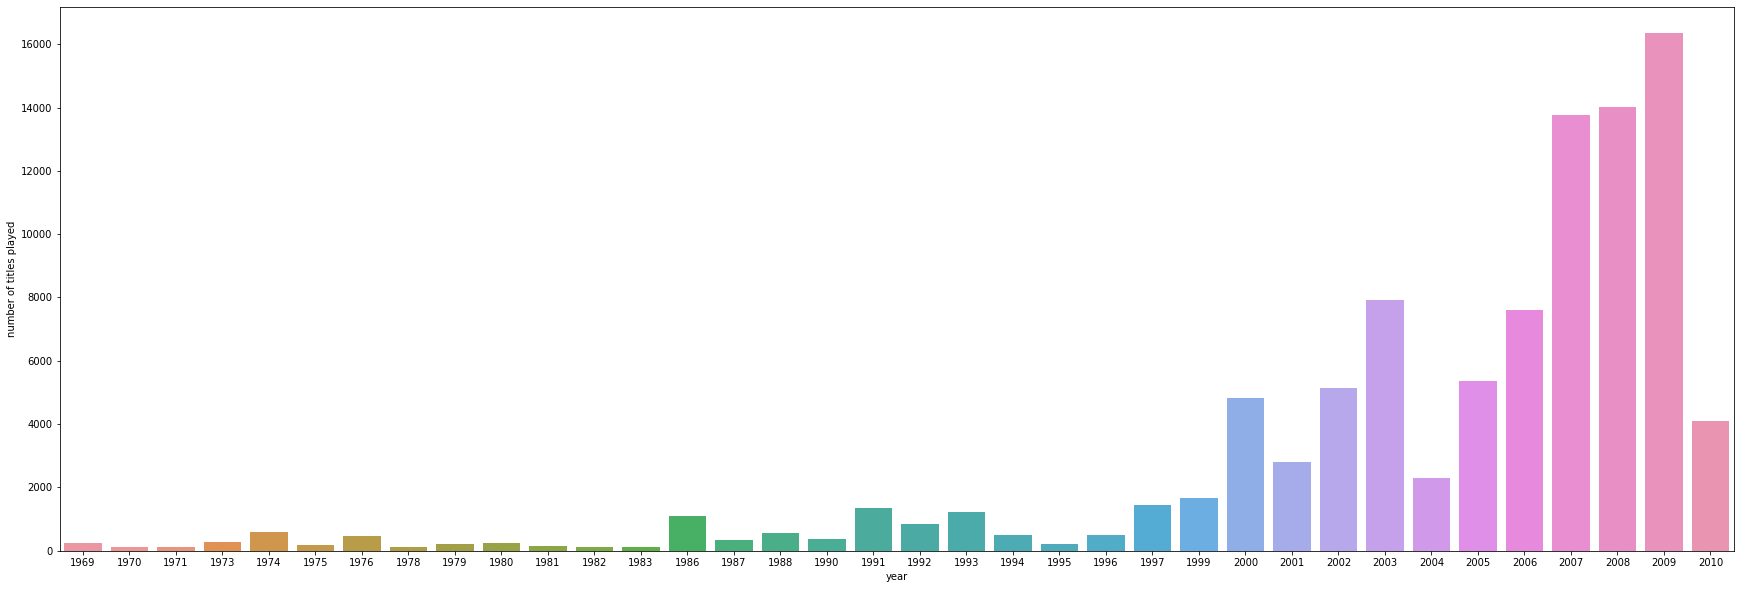

In [29]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

#### **Observations and Insights:** # 

* Our dataset has songs from **1969 to 2010**.
* The **year 2009** has the highest count of the number of titles played **(~16,000)**. 
* Followed by the year **2008 and 2007**, which have around **14,000 titles played**.
* The **year 2010** has few titles played **(~4000)**, it may be that the data was taken up to the first quarter of the year.

## **Checking the distribution of play_count**

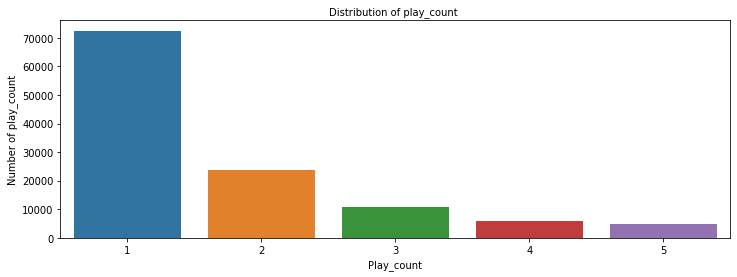

In [30]:
# Distribution of ratings
plt.figure(figsize = (12, 4))
sns.countplot(df_final['play_count'])
plt.tick_params(labelsize = 10)
plt.title("Distribution of play_count ", fontsize = 10)
plt.xlabel("Play_count", fontsize = 10)
plt.ylabel("Number of play_count", fontsize = 10)
plt.show()

**Observations:**

* The play_count 1 has the highest number of observations (~70,000). 
* Following this, play_count '2', '3', '4', '5' with ~25000, ~13000, ~8000, and ~6000, respecitvely.

**Think About It:** What other insights can be drawn using exploratory data analysis?

**Now that we have explored and prepared the data, let's build the first recommendation system.**

### **Model 1: Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [31]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count'] 

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id').sum()['play_count']  

In [32]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})


# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,430
22,1.492424,197
52,1.729216,728
62,1.728070,197
93,1.452174,167


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [33]:
# Build the function to find top n songs

def top_n_songs(final_play, n, min_interaction):
    
    # Finding products with minimum number of interactions
    recommendations = final_play[final_play['play_freq'] > min_interaction]
    
    # Sorting values with respect to average rating 
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)
    
    return recommendations.index[:n]

### **Recommending top 10 songs with 200 minimum interactions based on popularity**

In [34]:
# Recommend top 10 songs using the function defined above

res = list(top_n_songs(final_play, 10, 200))

# Name of the songs

list_of_songs = []
for i in res:
    list_of_songs.append(df_final[df_final['song_id']== i]['title'].unique()[0])
list_of_songs

['Victoria (LP Version)',
 'The Big Gundown',
 'Brave The Elements',
 'Greece 2000',
 'Secrets',
 'Transparency',
 'Video Killed The Radio Star',
 'Sehr kosmisch',
 'Luvstruck',
 "You're The One"]

### **Model 2: Collaborative Filtering Recommendation System**

In this type of recommendation system, `we do not need any information` about the users or items. We only need user item interaction data to build a collaborative recommendation system. For example - 
<ol>
    <li><b>Ratings</b> provided by users. For example, ratings of books on goodread, movie ratings on imdb, etc.</li>
    <li><b>Likes</b> of users on different facebook posts, likes on youtube videos.</li>
    <li><b>Use/buying</b> of a product by users. For example, buying different items on e-commerce sites.</li>
    <li><b>Reading</b> of articles by readers on various blogs.</li>
</ol>

- Similarity/Neighborhood based

 * User-User Similarity Based  
 * Item-Item similarity based

- Model based

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [35]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366461 sha256=57c64760aa080ec5ed22470ce720afaad90a75b9c07f889fb4f557d18a470f47
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [36]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (song in this case) that has actually a **play count higher than the threshold play count (here 1.5)** is relevant, if the **actual play count is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted play count is higher than the threshold (here 1.5) is a recommended item**, if the **predicted play count is below the threshold then that song will not be recommended to the user**.  

**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them. 

**Think About It:** Which metric should be used for this problem to compare different models?

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [37]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5? 

- To compute **precision and recall**, a **threshold of 1.5 and k value of 30 is taken for the recommended and relevant play counts**. 
- In the **present case, precision and recall both need to be optimized as the service provider would like to minimize both the losses discussed** above. Hence, we are going to use the performance measure of **F_1 score**. 

Below we are loading the **`df_final` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [38]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale= (0, 5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

- Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.
- **KNNBasic** is an algorithm that is also **associated with the surprise package**. It is used to find the **desired similar items among a given set of items**.

**Think About It:** How changing the test size would change the results and outputs?

### **User-user similarity-based recommendation system**

In [39]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, random_state = 1) # Use random_state = 1 

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**

* We can observe that the default user-user model has a **RMSE = 1.08** on the train set.
* Intuition of Recall - We are getting a **recall of ~0.69**, which means out of **all the relevant songs, 69% are recommended**. 
* Intuition of Precision - We are getting a **precision of ~ 0.39**, which means **out of all the recommended songs, 39% are relevant**.
* Here **F_1 score** of the **default user-user model is ~0.50**. It indicates that **nearly 50% of the recommended songs were relevant and relevant songs were recommended**. We can try to improve the performance by using **GridSearchCV to tune different hyperparameters** of the algorithm.

Let's now **predict rating for a user with `user_id=6958` and `song_id=1671`** as shown below. Here the user has already interacted or watched the product with song_id '1671' and having a play_count of 2 which is denoted by the parameter r_ui.

In [40]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

* The above output shows that **the actual play_count for this user-item pair is 2, and the predicted play_count is 1.80** by this **user-user-similarity-based baseline model**.

Below we are **predicting rating for the same `user_id=6958` but for a song which this user has not listen yet i.e. `prod_id=3232`** 

In [41]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

* The above code output shows that we have predicted the play_count for this user-item pair, we got an **estimated value of 1.64** based on this **user-user similarity-based baseline model**.

Now, let's try to tune the model and see if we can improve the model performance.

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithms. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise: 
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline
    - **min_support** (int) The minimum number of common items (when 'user_based' is 'True') or minimum number of common users (when 'user_based' is 'False') for the similarity not to be zero.

In [42]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse', 'mae'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0450706892741806
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters** as shown above.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [43]:
# Train the best model found in above gridsearch
sim_options = {'name':'pearson_baseline', 'user_based':True, 'min_support':2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 30
precision_recall_at_k(sim_user_user_optimized)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights:**

* We can observe that after tuning hyperparameters, **F_1 score of the tuned model is 0.525, which is slightly better than the baseline model which was 0.504**. 
* **Also, the RMSE of the model has slightly reduced from 1.08 to 1.05  as compared to the baseline model**. Hence, we can say that the model performance has improved slightly.

Let's now **predict the play_count for a user with `user_id` = "6958" and song_id = 1671 with the optimized model as shown below**.

In [44]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

**Observations and Insights:**

* There is a difference between the **baseline model and the optimized model** with the estimated value of **play_count**, although both models would classify the song as relevant. With this model we got an **estimated value of 1.96** which is very close to the real value.

Now let's **predict the play_count for the same `user_id` = "6958", but with a song the user have not listened to yet, that is song_id = 3232 with the optimized model as shown below**.

In [45]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**

* For the **predicted value** of the song with **song_id = 3232** that the user has not interacted before we got an **estimated value of 1.45**. In this case the optimized model would not classify this song as relevant, but with the previous model yes. 

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

### **Identifying similar Users to a given User (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [46]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, 5)

[42, 1131, 17, 186, 249]

### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [47]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended song ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # Extracting those songs ids which the user_id has not listened yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the songs ids which user_id has not interacted yet
    for song_id in non_interacted_products:
        
        # Predicting the play_count for those non listened songs ids by this user
        est = algo.predict(user_id, song_id).est
        
        # Appending the predicted play_count
        recommendations.append((song_id, est))

    # Sorting the predicted play_count in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted play_count song for this user

#### **Predicting top 5 songs for user_id = "6958" with similarity based recommendation system**

In [48]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [49]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


**Observations and Insights:**

* With the above code output we got a dataframe with, in this case, 5 recommended songs for the user with **user_id = 6958** that have not listened before. 
* Also, it contains a **predicted_play_count** column where we got an estimated value the user will play that song.

### **Correcting the play_counts and Ranking the above songs**

While comparing the play_count of two songs, it is not only the **play_count** that describe the **likelihood of the user to that song**. Along with the play_count, the **number of users who have listen that song** also becomes important to consider. Due to this, we have calculated the **"corrected_play_count"** for each song. Commonly higher the **"play_freq" of a song more it is liked by users**. To interpret the above concept, a **song play_count of 5 with play_freq 20 is less liked in comparison to a song with play_count 4 with a play_freq count of 100**. It has been **empirically found that the likelihood of the song is directly proportional to the inverse of the square root of the play_freq of the product**.

In [50]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] + 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)
  
  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

**Note:** In the **above-corrected rating formula**, we can add the **quantity `1/np.sqrt(n)` instead of subtracting it to get more optimistic predictions**. But here we are **subtracting this quantity**, as there are some products with ratings 5 and **we can't have a rating more than 5 for a product**.

In [51]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
0,5531,1427,2.553335,2.579807
1,317,836,2.518269,2.552855
3,4954,338,2.406776,2.461169
4,8635,259,2.396606,2.458743
2,5943,830,2.390723,2.425434


**Observations and Insights:**

* In the above code output we got the corrected_play_count based on the predicted_play_count column using the formula 1/np.sqrt(n).

### **Item Item Similarity-based collaborative filtering recommendation systems** 

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**. 

In [52]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**

* We can observe that the baseline model has `RMSE = 1.03` & `F_1 Score = 0.39`on the test set.
* We got a low value on **F_1 score**, we can try to **improve the performance number by using `GridSearchCV`** to tune different hyperparameters of this algorithm.

Let's now **predict a play_count for a user with `user_id = 6958` and `song_id = 1671`** as shown below. Here the user has already listened the song with song_id "1671".

In [53]:
#Checking the real value of play_count on user id 6958 with song id 1671
df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == 1671)]

,user_id,song_id,play_count,title,release,artist_name,year
215,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003


In [54]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**

* In the above code output shows that **the actual rating for this user-item pair is 2 and the predicted rating is 1.36** by the **item-item-similarity-based baseline model**. Hence, our model would not classify this song as relevant for this user.

Below we are **predicting rating for other `user_id = 47786` but for a song with which this user has not listened yet, i.e., `song_id = 1671`**.

In [55]:
#Looking for the user id that has not listened to song id 1671 before
df_final[df_final['song_id'] != 1671]

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
1999745,47786,9351,2,The Police And The Private,Live It Out,Metric,2005
1999755,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006


In [56]:
#Making sure the user has not listened to the song id 1671
df_final[(df_final['user_id'] == 47786) & (df_final['song_id'] == 1671)]

,user_id,song_id,play_count,title,release,artist_name,year


In [57]:
# Predict the play count for a user  that has not listened to the song (with song_id 1671)
sim_item_item.predict(47786, 1671, verbose = True)

user: 47786      item: 1671       r_ui = None   est = 1.94   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=47786, iid=1671, r_ui=None, est=1.9365719326237714, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

* In the above code output we can see the **predicted rating for this user-item pair is 1.94** based on this **item-item similarity-based baseline model**. Hence, our model would clasiffy this song as relevant for this user.

#### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below we will be **tuning hyperparameters for the `KNNBasic` algorithms**.

### **Hyperparameter tuning the item-item similarity-based model.**

In [58]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

In [59]:
# Apply the best modle found in the grid search

# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name':'pearson_baseline', 'user_based':False, 'min_support':2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options , k = 30 , min_k = 6 , random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Observations and Insights:**

* We observe that after tuning hyperparameters, **F_1 score of the model is better than the baseline model increasing from ~0.39 to ~0.50**. 
* Along with this, **the RMSE of the model has slightly gone down in comparison to the baseline item-item model**. Hence, we can say that the model performance has improved after hyperparameter tuning.
* At this point, the model that has the best performance with the **F_1 score** is the optimized user-user model. Let's see if we can get better performance with other models. 

Let's us now predict **play_count for an user with `user_id = 6958` and for `song_id = 1671`** with the **optimized model** as shown below:

In [60]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**

* The optimized model is predicting an **estimated play_count of 1.96**, a close value to the real one.

Below we are **predicting play_count** for the same **`user_id = 6958`** but for a song with which this user **has not listened before**, i.e., `song_id == 3232`, by using the optimized model as shown below:

In [61]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**

* For an un heard song the model is **predicting a play_count of 1.28**.

#### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [62]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, 5)

[124, 523, 173, 205, 65]

#### **Predicted top 5 songs for user_id = "6958" with similarity based recommendation system.**

In [63]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [64]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [65]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
4,2342,146,2.653903,2.736664
3,5101,192,2.386577,2.458746
2,139,207,2.313727,2.383232
1,7519,235,2.270864,2.336096
0,8099,465,2.212702,2.259076


**Observations and Insights:**

* With the **optimized item-item model** we got **different 5 similar neigbors** unlike the **optimized user-user model**.
* Also, we got the **corrected_play_count** based on the **predicted_play_count column** using the **ranking_songs function** on recommendations.

### **Model 3: Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### **Singular Value Decomposition (SVD)**

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [66]:
# Build baseline model using svd
svd = SVD(random_state = 1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


- Let's now predict the play_count for a user with `user_id = "6958"` and `song_id = "1671` as shown below.
- Here, the user has already listen the song.

In [67]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

**Observations and Insights:**

- As we can observe, **the actual play_count** for this user-item pair is 2, and the predicted play_count is **1.27** by this matrix **factorization-based baseline model**. It seems like we have under-estimated the play_count. We will try to fix this later by **tuning the hyperparameters** of the model using GridSearchCV.

- Below we are predicting rating for the same user with `user_id = 6958` but for a song with which this user has not interacted before, i.e., `song_id = 3232`, as shown below:

In [68]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

**Observations and Insights:**

- We can see that the **estimated play_count** for this **user-item pair** is 1.56 based on this **matrix factorization based baseline model**.

#### **Improving matrix factorization based recommendation system by tuning its hyperparameters**

In SVD, rating is predicted as: 

$$\hat{r}_{u i}=\mu+b_{u}+b_{i}+q_{i}^{T} p_{u}$$

If user $u$ is unknown, then the bias $b_{u}$ and the factors $p_{u}$ are assumed to be zero. The same applies for item $i$ with $b_{i}$ and $q_{i}$.

To estimate all the unknown, we minimize the following regularized squared error:

$$\sum_{r_{u i} \in R_{\text {train }}}\left(r_{u i}-\hat{r}_{u i}\right)^{2}+\lambda\left(b_{i}^{2}+b_{u}^{2}+\left\|q_{i}\right\|^{2}+\left\|p_{u}\right\|^{2}\right)$$

The minimization is performed by a very straightforward **stochastic gradient descent**:

$$\begin{aligned} b_{u} & \leftarrow b_{u}+\gamma\left(e_{u i}-\lambda b_{u}\right) \\ b_{i} & \leftarrow b_{i}+\gamma\left(e_{u i}-\lambda b_{i}\right) \\ p_{u} & \leftarrow p_{u}+\gamma\left(e_{u i} \cdot q_{i}-\lambda p_{u}\right) \\ q_{i} & \leftarrow q_{i}+\gamma\left(e_{u i} \cdot p_{u}-\lambda q_{i}\right) \end{aligned}$$

There are many hyperparameters to tune in this algorithm, find a full list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD)

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [69]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data) 

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.012572420819148
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

Once the **grid search** is complete, we can get the **optimal values** for each of those hyperparameters, as shown above.

Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [70]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**

*  We observe that **after tuning hyperparameters, the model performance has not improved by much**. We got almost the same values as the baseline model. 

Let's now predict a play_count for a user with `user_id = 6958` and `song_id = 1671` with the optimized model as shown below.

In [71]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125098, details={'was_impossible': False})

In [72]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

**Observations and Insights:**

* With the **optimized matrix factorization model** we got a higher estimated play_count value of '1.34' that is closer to the real play_count unlike the **matrix factorization-based model** where we got an estimated play_count value of '1.27'. Although the two values are far from the actual value.

* For the unknown real value, our **optimized matrix factorization-based model** under-estimated the play_count with a value of '1.44', unlike the **matrix factorization-based model** that got an estimated play_count value of '1.56'.

### **Get 5 recommendations for the user with user_id = '6958' using the svd_optimized model.**

In [73]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [74]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
1,7224,361,2.601899,2.654530
4,5653,248,2.108728,2.172228
3,8324,252,2.014091,2.077085
2,6450,263,1.952493,2.014155
0,9942,373,1.940115,1.991893


**Observations and Insights:**

* We got 5 recommendations for the user with **user_id = 6958** with the **svd_optimized model** and with the **corrected_play_count**.

### **Model 4: Cluster Based Recommendation System**

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

- **Co-clustering** is a set of techniques in **Cluster Analysis**. Given some **matrix A, we want to cluster rows of A and columns of A simultaneously**, this is a common task for user-item matrices. 

- As it clusters both the rows and the columns simultaneously, it is also called **bi-clustering**. To understand the working of the algorithm, let A be m x n matrix, the goal is to generate co-clusters: a subset of rows that exhibit similar behavior across a subset of columns, or vice versa.

- Co-clustering is defined as two map functions:
rows -> row cluster indexes
columns -> column cluster indexes.

These map functions are learned simultaneously. It is **different from other clustering techniques** where we cluster **first the rows and then the columns**. 

In [75]:
# Make baseline clustering model
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


Now, let's **predict the play_count for the user with `user_id = 6958` and the song with `song_id = 1671`** as shown below. Here, the user has already listened the song with song_id 1671.

In [76]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

**Observations and Insights:**

- The actual play_count for this user-item pair is 2 and the **predicted play_count by this Co-clustering is 1.29 which is not close to the predicted play_count**. The model has under-estimated the play_count. We will try to fix this by tuning the hyperparameters of the model using GridSearchCV.

Below, we are **predicting the play_count for the same `user_id = 6958`** but for a song with which **this user has not interacted before, i.e., `song_id = 3232`**, as shown below.

In [77]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### **Improving clustering-based recommendation system by tuning its hyper-parameters**

Below, we will be tuning hyperparameters for the `CoClustering` algorithm. Let's try to understand the different hyperparameters of this algorithm.

- **n_cltr_u** (int) – Number of **user clusters**. The default value is 3.
- **n_cltr_i** (int) – Number of **item clusters**. The default value is 3.
- **n_epochs** (int) – Number of **iteration of the optimization loop**. The default value is 20.
- **random_state** (int, RandomState instance from NumPy, or None) – Determines the RNG that will be used for initialization. If int, random_state will be used as a seed for a new RNG. This is useful to get the same initialization over multiple calls to fit(). If RandomState instance, this same instance is used as RNG. If None, the current RNG from NumPy is used. The default value is None.
- **verbose** (bool) – If True, the current epoch will be printed. The default value is False.

In [78]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.059275268857786
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


Once the grid search is **complete**, we can get the **optimal values** for each of those hyperparameters as shown above.

We will build **final model** by using tuned values of the hyperparameters received after using the Grid search cross-validation above.

**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [79]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 10, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


**Observations and Insights:**

* We can see that the **F_1 score** for **tuned co-clustering model** is **0.46** and is slightly lower than the **F_1 score** for the **baseline Co-clustering model** that is **0.47**.

Let's now **predict the play_count** for the user with `user_id = 6958` and for the song with `song_id = 1671` as shown below. Here, the user has already listened the song.

In [80]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

Below, we are **predicting the play_count for the same `user_id = 6958`** but for a song with which this **user has not interacted before, i.e., `song_id = 3232`**, as shown below.

In [81]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

**Observations and Insights:**

* With the **optimized clustering model** we got a higher estimated play_count value of '1.91' that is closer to the real play_count unlike the **clustering-based model** where we got an estimated play_count value of '1.29'.

* For the unknown real value, our **optimized clustering model** under-estimated the play_count with a value of '1.24', unlike the **clustering-based model** that got an estimated play_count value of '1.48'.

#### **Implementing the recommendation algorithm based on optimized CoClustering model**

In [82]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### **Correcting the play_count and Ranking the above songs**

In [83]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_play_count,corrected_play_count
1,7224,361,3.711503,3.764135
4,5653,248,2.903883,2.967383
0,6860,367,2.691043,2.743242
2,657,335,2.606354,2.660989
3,8483,275,2.582807,2.643110


**Observations and Insights:**

* We got 5 recommendations for the user with **user_id = 6958** with the **clust_tuned model** and with the **corrected_play_count**.
* The first two songs that are being recommended by this model are also being recommended by the svd optimized model, but with different predicted values. The remaining three songs are different.

### **Model 5: Content Based Recommendation Systems**

In a **content-based recommendation system**, we will use the feature - **text**, i.e., play_count to find similar songs.

Text data generally contains pronunciation, stopwords, and non-ASCII characters, which makes it **very noisy**. So, we will first need to **pre-process the text** and then we will **generate features from the text to compute similarities** between the texts/reviews.

Let's load the **tags dataset.**

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [84]:
df_small = df_final

In [85]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']
df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


Now, we will **keep only four columns** - user_id, song_id, play_count, and text. We will drop the duplicate titles from the data and make it the **title column as the index** of the dataframe.

In [86]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [87]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

**Now, let's process the text data and create features to find the similarity between songs.**

### **Loading libraries to handle the text data**

In [88]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet 
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [89]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

We will create a **function to pre-process the text data**. Before that, let's see some **terminology**.
- **stopwords:** A stop word is a commonly used word (such as “the”, “a”, “an”, or “in”) that does not contain information in the text and can be ignored.
- **Lemmatization:** Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analyzed as a single item. For example, runs, running, and ran are all forms of the word run, therefore run is the lemma of all these words.

In [90]:
# Function to tokenize the text
def tokenize(text):
    
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    tokens = word_tokenize(text)
    
    words = [word for word in tokens if word not in stopwords.words('english')]  # Use stopwords of english
    
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

### **Feature Extraction**

Below are some of the ways to extract features from texts:
- Bag of words
- TF-IDF
- One hot encoding
- Word vectors

Here, we will be using **TF-IDF** as a feature extraction technique.

In [91]:
# Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [92]:
# Making the DataFrame of movie_tfidf data
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have **extracted features from the text data**. Now, we can find similarities between songs using these features. We will use cosine similarity to calculate the similarity.

In [93]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

**Finally, let's create a function to find most similar songs to recommend for a given song.**

In [94]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

### **Recommending 10 songs similar to Learn to Fly**

In [95]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations and Insights:**

* The **Learn To Fly song** is from **Foo Fighters** and belongs to **Alternative/Rock and Pop Rock** genres, and the **majority of the recommendations** lie in one or both of these genres. 
* Also, the band or the artists that are recommended make music of similar genres.
* We can imply that the resulting recommendation system is working well.

## **Conclusion and Recommendations:**

In this case study, we built recommendation systems using four different algorithms. They are as follows:
  - Rank-based using averages
  - User-User similarity-based collaborative filtering
  - Item-Item similarity-based collaborative filtering
  - Model-based collaborative filtering (matrix factorization)
  - Clustering-based recommendation systems
  - Content-based recommendation systems
  
- The **surprise** library was used to demonstrate**"user-user similarity-based collaborative filtering," "item-item similarity-based collaborative filtering," "model-based collaborative filtering (matrix factorization) and clustering-based recommendation systems"** algorithms. For these algorithms, grid search cross-validation is used to find the optimal hyperparameters for the data, and related predictions are created using the optimal hyperparameters.

- **For performance evaluation** of these models **precision@k and recall@k** are used. Using these two metrics, the **F_1 score** is calculated for each working model. 
- Overall, the optimized user-user similarity-based recommendation system has given the best performance in terms of the F1-Score with a score of 0.525.

- We can try to further improve the performance of these models using hyperparameter tuning. 
- We can also combine different recommendation techniques to build hybrid recommendation systems.